LFW dataset loaded.
Number of faces: 2229
Number of persons: 1048


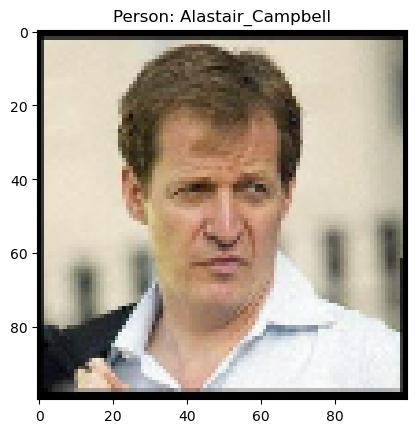

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# LFW dataset path
lfw_path = "D:/archive (10)/lfw-deepfunneled/lfw-deepfunneled/"

# Dictionary: person_name -> list of their images
data = {}
labels = []
images = []

for person in os.listdir(lfw_path):
    person_folder = os.path.join(lfw_path, person)
    if os.path.isdir(person_folder):
        for img_name in os.listdir(person_folder):
            img_path = os.path.join(person_folder, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (100, 100))
                
                images.append(img)
                labels.append(person)

X_faces = np.array(images) / 255.0  # Normalize
y_faces = np.array(labels)

print("LFW dataset loaded.")
print(f"Number of faces: {len(X_faces)}")
print(f"Number of persons: {len(set(y_faces))}")

# Show sample image
import random
idx = random.randint(0, len(X_faces)-1)
plt.imshow(X_faces[idx])
plt.title(f"Person: {y_faces[idx]}")
plt.show()


Found 11350 images belonging to 2 classes.
Found 2836 images belonging to 2 classes.
Number of classes detected: 2


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,732,034 (6.61 MB)

 Trainable params: 1,732,034 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 87s 237ms/step - accuracy: 0.5090 - loss: 0.6985 - val_accuracy: 0.5063 - val_loss: 0.6947
Epoch 2/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.5316 - loss: 0.6918 - val_accuracy: 0.5081 - val_loss: 0.6958
Epoch 3/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.5424 - loss: 0.6859 - val_accuracy: 0.5113 - val_loss: 0.7055
Epoch 4/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.5440 - loss: 0.6833 - val_accuracy: 0.4951 - val_loss: 0.7145
Epoch 5/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.5754 - loss: 0.6741 - val_accuracy: 0.4968 - val_loss: 0.7313
Epoch 6/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.5948 - loss: 0.6633 - val_accuracy: 0.4996 - val_loss: 0.7227
Epoch 7/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.6351 - loss: 0.6362 - val_accuracy: 0.5018 - val_loss: 0.7639
Epoch 8/25
355/355 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.6480 - loss: 0.6209 -

Emotion model saved as 'emotion_model.h5' successfully!


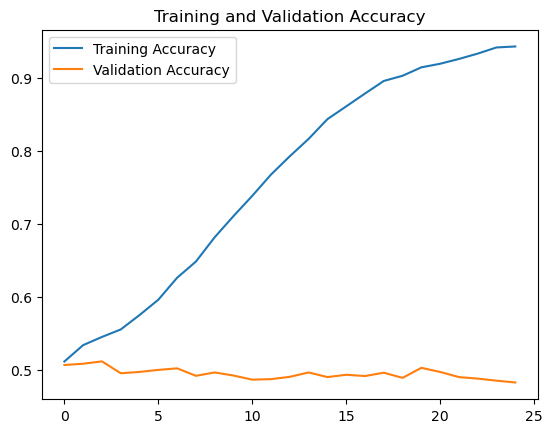

In [4]:
# Emotion Model Training - Full Code

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Step 1: Prepare the Data

# Set your dataset path here
data_path_emotion = 'D:/archive (11)/emotion_dataset'  # <-- Correct your path

# Data augmentation and normalization
emotion_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Train generator
train_emotion_generator = emotion_datagen.flow_from_directory(
    data_path_emotion,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation generator
test_emotion_generator = emotion_datagen.flow_from_directory(
    data_path_emotion,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# Automatically detect number of classes
num_classes = len(train_emotion_generator.class_indices)
print(f"Number of classes detected: {num_classes}")

# Step 2: Build the Emotion Model

emotion_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # No need to manually set number
])

emotion_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

emotion_model.summary()

# Step 3: Train the Model

history = emotion_model.fit(
    train_emotion_generator,
    validation_data=test_emotion_generator,
    epochs=25  # You can change epochs
)

# Step 4: Save the Model

emotion_model.save('emotion_model.h5')  # Saved in current working directory
print("Emotion model saved as 'emotion_model.h5' successfully!")

# Step 5: Optional: Plot training and validation accuracy

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [4]:
import cv2
import numpy as np
from keras.models import load_model

# Load model
emotion_model = load_model('emotion_model.h5')

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Crop the face
        roi_color = frame[y:y+h, x:x+w]

        # Resize to (100, 100) because model expects (100, 100, 3)
        roi_resized = cv2.resize(roi_color, (100, 100))

        # Normalize pixel values
        roi_normalized = roi_resized / 255.0

        # Expand dimensions to match model input shape (1, 100, 100, 3)
        roi_input = np.expand_dims(roi_normalized, axis=0)

        # Predict emotion
        prediction = emotion_model.predict(roi_input)
        max_index = int(np.argmax(prediction))
        predicted_emotion = emotion_labels[max_index]

        # Draw rectangle and put emotion text
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, predicted_emotion, (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Show frame
    cv2.imshow('Emotion Detection', frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━